1) What was the change in price of the stock?

2) What was the moving average of the various stocks?

3) What was the daily return of the stock on average?

4) What was the correlation between different stocks' closing prices?

5) How much value we put at risk by investing in a particular stock?

6) How can we attempt to predict future prices?


In [220]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [202]:
import pandas_datareader as pdr
from datetime import datetime

# Question 1
1) What was the change in price of the stock?

In [170]:
comp_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [171]:
end = datetime.now()
end = datetime(end.year, end.month, end.day)
start = datetime(end.year - 1, end.month, end.day)

In [172]:
for stock in comp_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end)

In [173]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,239.321344,234.340198,236.531660,237.019446,3.159917e+07,235.752365
std,44.471538,43.221598,43.707783,44.060102,1.649126e+07,44.658212
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,203.380005,199.389999,201.020004,201.550003,2.115810e+07,199.910309
50%,221.369995,217.559998,220.000000,219.889999,2.655860e+07,218.712738
75%,271.000000,265.390015,267.480011,268.480011,3.490860e+07,267.844330
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


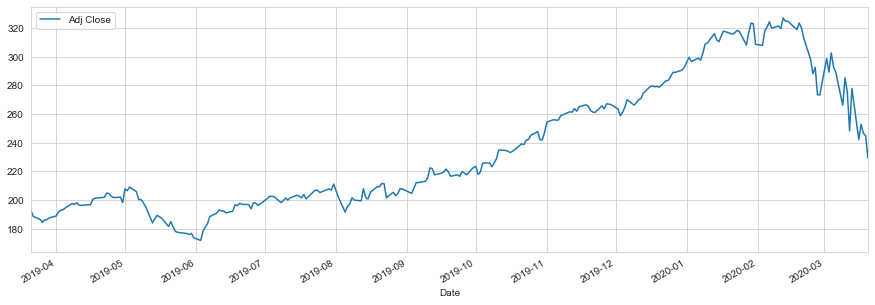

In [211]:
AAPL['Adj Close'].plot(legend=True, figsize=(15, 5))

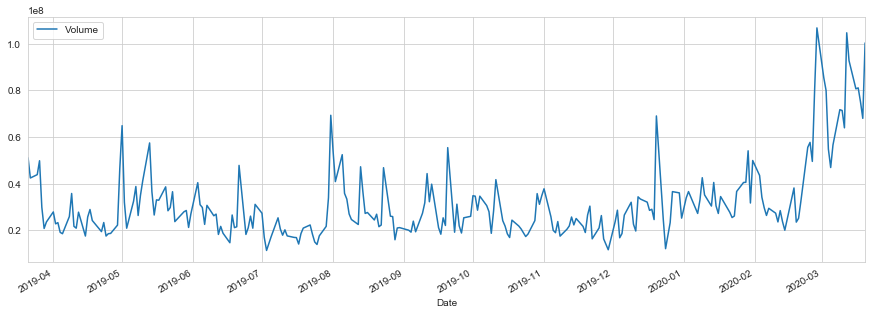

In [212]:
AAPL['Volume'].plot(legend=True, figsize=(15, 5))

# Question 2
What was the moving average of the various stocks?

In [176]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f'MA for {ma} days'
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

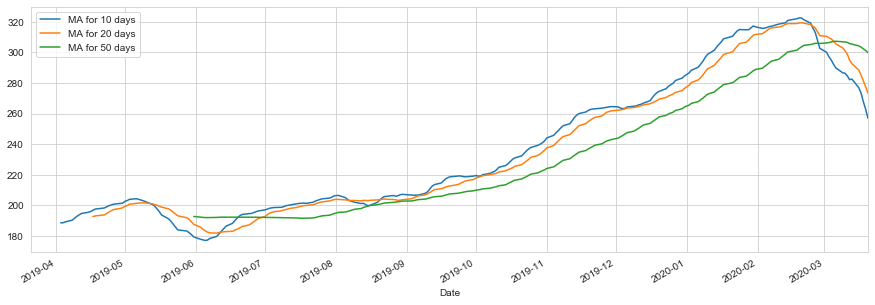

In [177]:
AAPL[['MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(legend=True, figsize=(15, 5))

In [178]:
for ma in ma_day:
    column_name = f'MA for {ma} days'
    MSFT[column_name] = MSFT['Adj Close'].rolling(ma).mean()

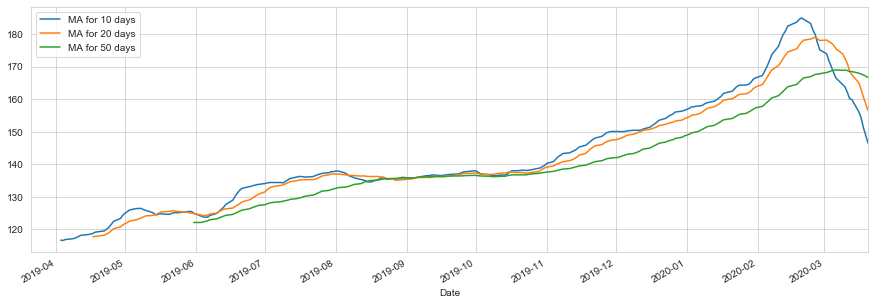

In [179]:
MSFT[['MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(legend=True, figsize=(15, 5))

# Question 3
What was the daily return of the stock on average?

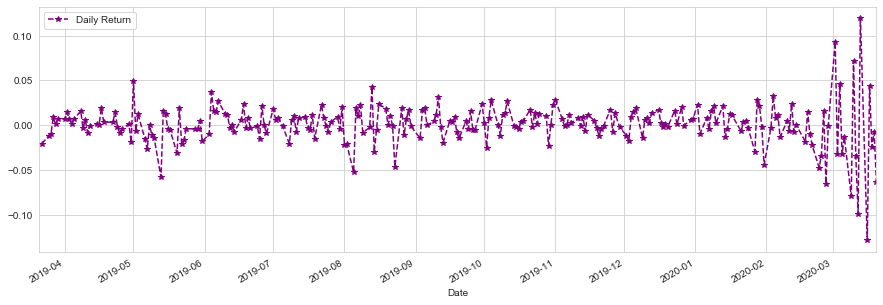

In [180]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend=True, figsize=(15, 5), linestyle = 'dashed', marker = '*', color='purple')

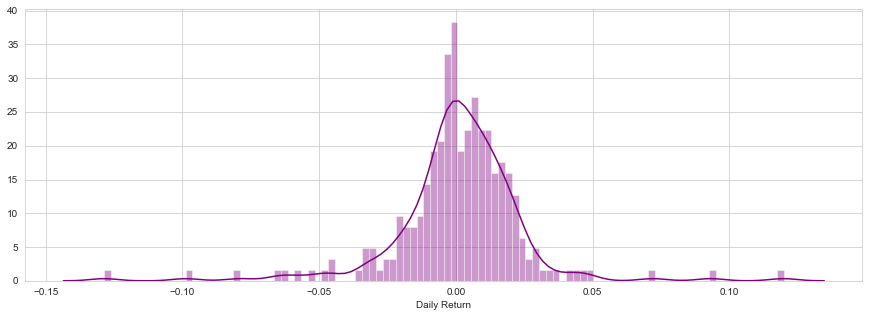

In [181]:
plt.figure(figsize=(15, 5))
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

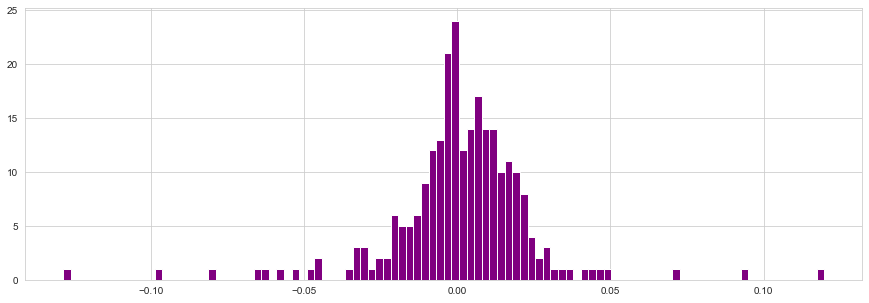

In [182]:
AAPL['Daily Return'].hist(bins=100, figsize=(15, 5), color='purple')

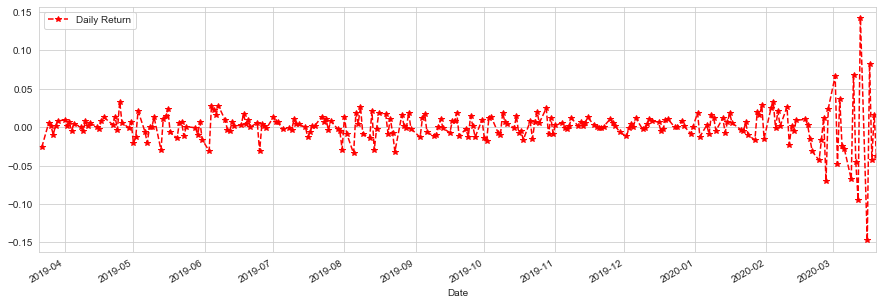

In [187]:
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
MSFT['Daily Return'].plot(legend=True, figsize=(15, 5), linestyle = 'dashed', marker = '*', color='red')

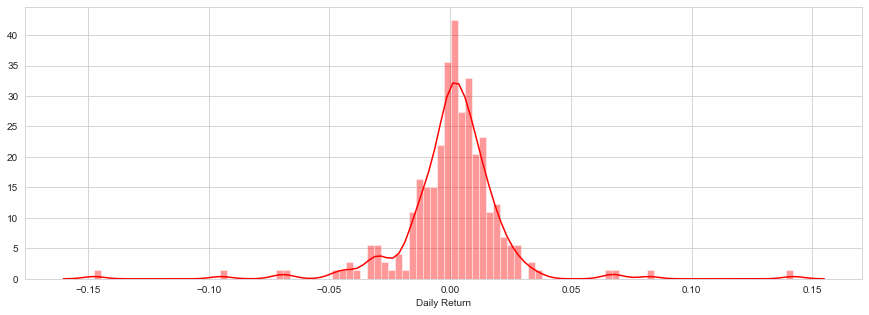

In [188]:
plt.figure(figsize=(15, 5))
sns.distplot(MSFT['Daily Return'].dropna(), bins=100, color='red')

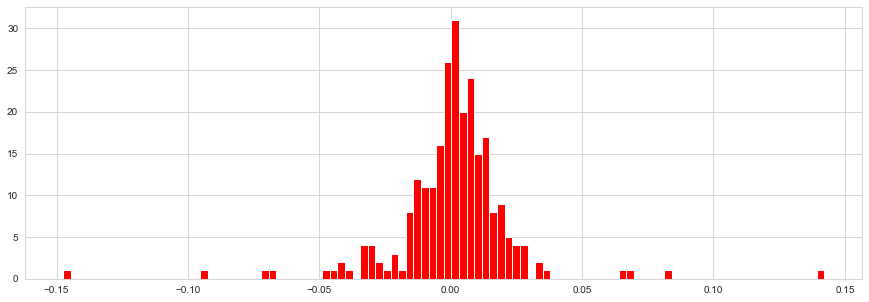

In [189]:
MSFT['Daily Return'].hist(bins=100, figsize=(15, 5), color='red')

# Question 4
What was the correlation between different stocks' closing prices?

In [190]:
closing_df = pdr.get_data_yahoo(comp_list, start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-03-21,192.569427,1231.540039,118.650192,1819.260010
2019-03-22,188.581650,1205.500000,115.521576,1764.770020
2019-03-25,186.301483,1193.000000,116.123627,1774.260010
2019-03-26,184.376678,1184.619995,116.370346,1783.760010
2019-03-27,186.034973,1173.020020,115.245224,1765.699951


In [191]:
tech_rets = closing_df.pct_change()
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-03-21,NaN,NaN,NaN,NaN
2019-03-22,-0.020708,-0.021144,-0.026368,-0.029952
2019-03-25,-0.012091,-0.010369,0.005212,0.005377
2019-03-26,-0.010332,-0.007024,0.002125,0.005354
2019-03-27,0.008994,-0.009792,-0.009668,-0.010125
...,...,...,...,...
2020-03-16,-0.128647,-0.111008,-0.147390,-0.053697
2020-03-17,0.043970,0.032712,0.082337,0.070266
2020-03-18,-0.024480,-0.020539,-0.042096,0.012258


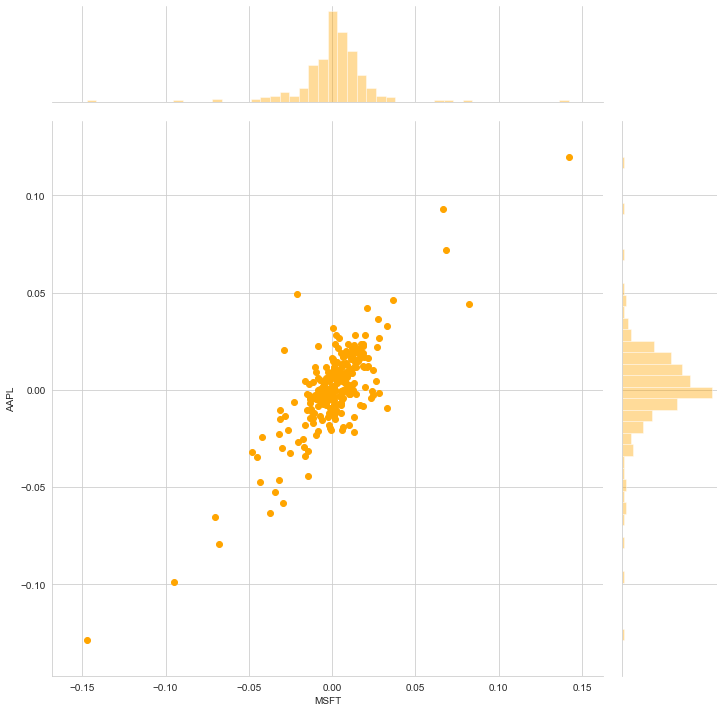

In [192]:
sns.jointplot('MSFT', 'AAPL', tech_rets, kind='scatter', color='orange', height=10)

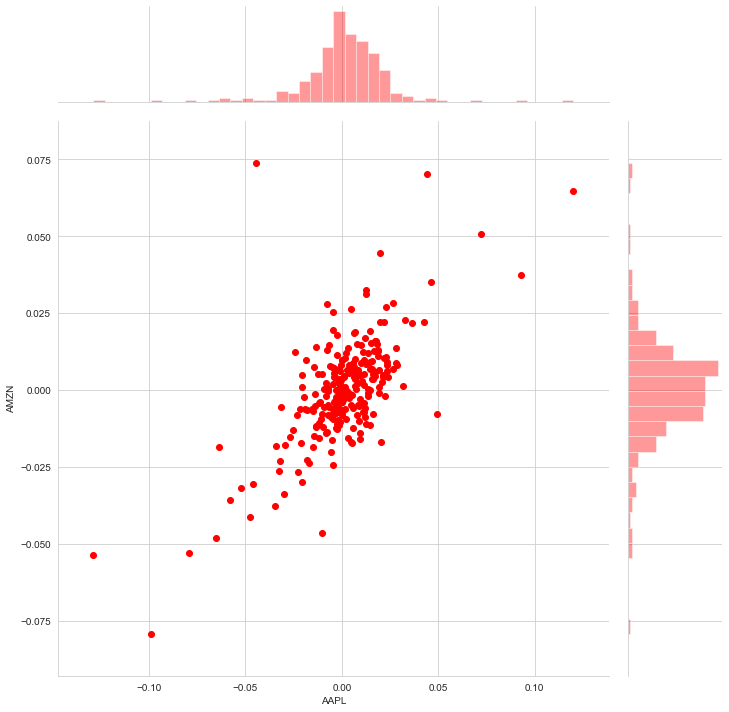

In [193]:
sns.jointplot('AAPL', 'AMZN', tech_rets, kind='scatter', color='red', height=10)

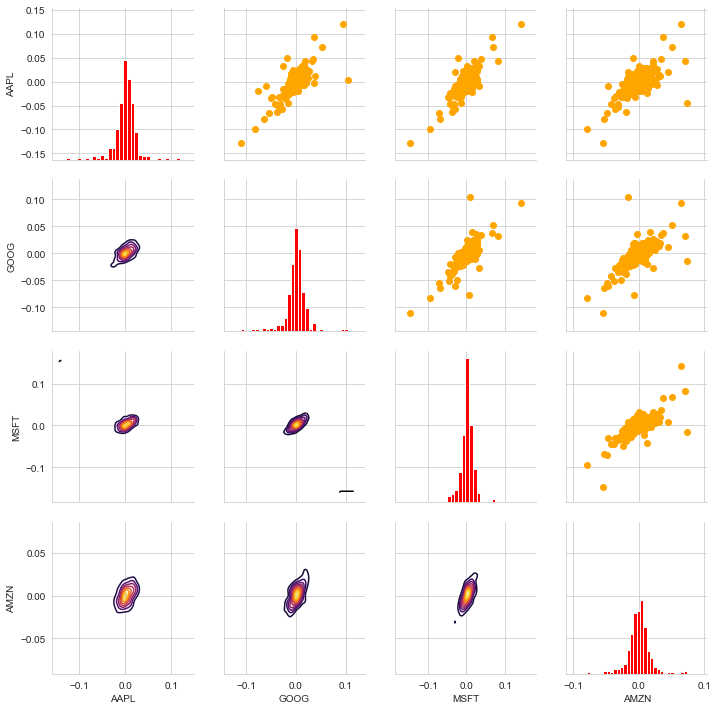

In [194]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='orange', )
returns_fig.map_lower(sns.kdeplot, cmap='inferno')
returns_fig.map_diag(plt.hist, bins=30, color='red')

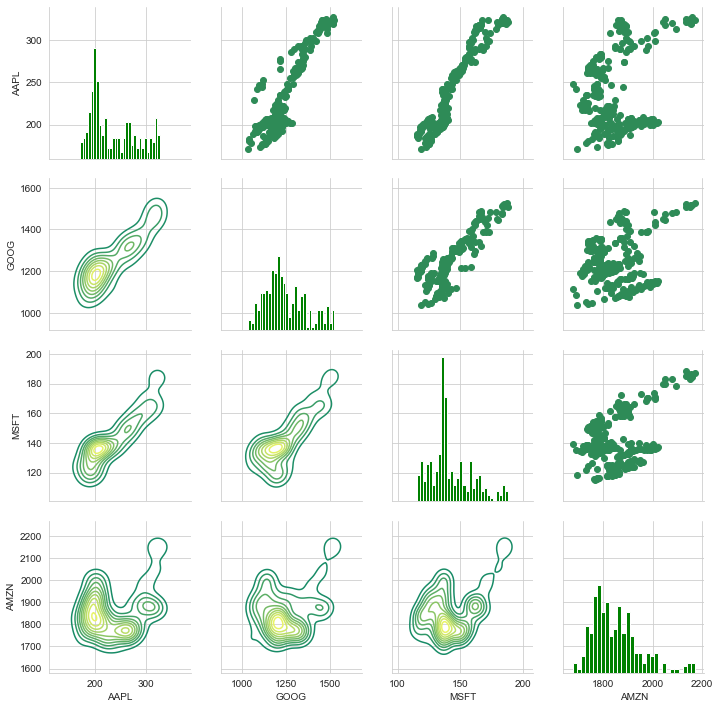

In [195]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='seagreen', )
returns_fig.map_lower(sns.kdeplot, cmap='summer')
returns_fig.map_diag(plt.hist, bins=30, color='green')

(4.0, 0.0)

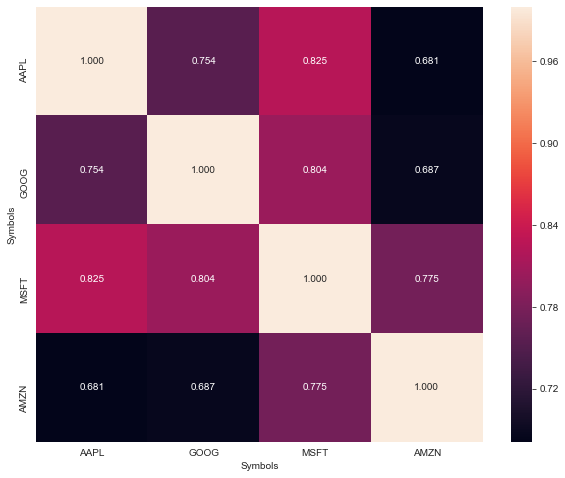

In [196]:
plt.figure(figsize=(10, 8))
# using hard approach to plot heatmap in order to fix bug of new versions of matplotlib (first and last row cut in half of heatmap plot)
corr_plot = sns.heatmap(tech_rets.dropna().corr(), annot=True, fmt='.3f')
x, y = corr_plot.get_ylim()
corr_plot.set_ylim(x + 0.5, y - 0.5)

(4.0, 0.0)

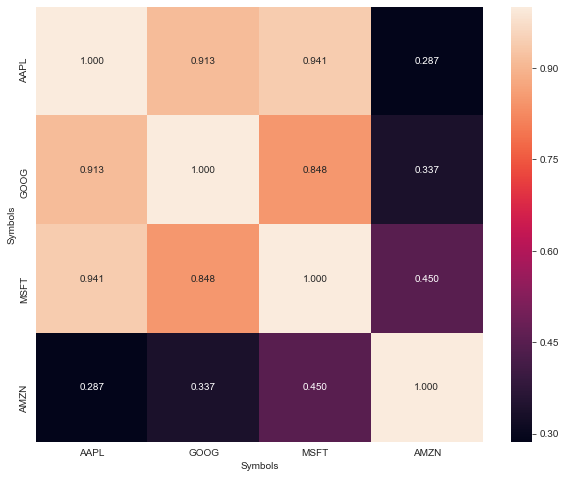

In [197]:
plt.figure(figsize=(10, 8))
# using hard approach to plot heatmap in order to fix bug of new versions of matplotlib (first and last row cut in half of heatmap plot)
corr_plot = sns.heatmap(closing_df.dropna().corr(), annot=True, fmt='.3f')
x, y = corr_plot.get_ylim()
corr_plot.set_ylim(x + 0.5, y - 0.5)

# Question 5
5) How much value we put at risk by investing in a particular stock?

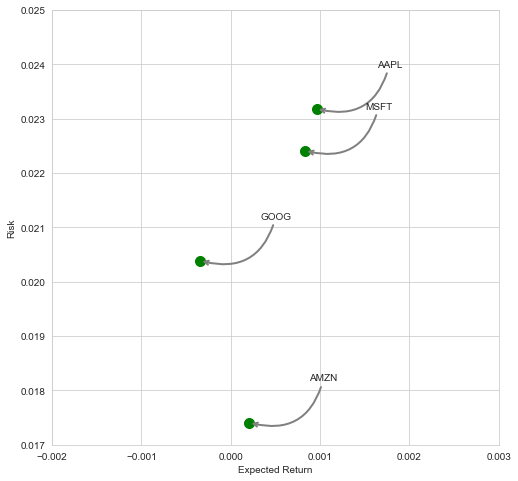

In [315]:
tech_rets = tech_rets.dropna()
plt.figure(figsize=(8, 8))
f = plt.scatter(tech_rets.mean(), tech_rets.std(), c='green', s=100)

plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.xlim(-0.002, 0.003)
plt.ylim(0.017, 0.025)
for label, x, y in zip(tech_rets.columns, tech_rets.mean(), tech_rets.std()):
    ax = plt.annotate(label, xy=(x, y), xytext=(60, 40), textcoords='offset points',
                 ha='left', va='bottom', arrowprops = dict(color='grey', lw=2, arrowstyle='->', connectionstyle = 'arc3,rad=-0.5'))

In [297]:
#The emperical quantile of daily returns
qAAPL = tech_rets['AAPL'].quantile(0.01)
qMSFT = tech_rets['MSFT'].quantile(0.01)
qAMZN = tech_rets['AMZN'].quantile(0.01)
qGOOG = tech_rets['GOOG'].quantile(0.01)
print(f'With 99% confidence, worst daily return of AAPL is: {qAAPL}')
print(f'With 99% confidence, worst daily return of MSFT is: {qMSFT}')
print(f'With 99% confidence, worst daily return of AMZN is: {qAMZN}')
print(f'With 99% confidence, worst daily return of GOOG is: {qGOOG}')

With 99% confidence, worst daily return of AAPL is: -0.07209290655868465
With 99% confidence, worst daily return of MSFT is: -0.06908890611453253
With 99% confidence, worst daily return of AMZN is: -0.050447857538687746
With 99% confidence, worst daily return of GOOG is: -0.07025586063082358


# Question 6
How can we attempt to predict future stock behavior?

I am going to use Monte Carlo Method to predict future stocks prices

In [318]:
def stocks_monte_carlo(start_price, average, sigma, time_period=365):
    dt = 1 / time_period
    
    price = np.zeros(time_period)
    price[0] = start_price
    
    shock = np.zeros(time_period)
    drift = np.zeros(time_period)
    
    for t in range(1, time_period):
        shock[t] = np.random.normal(loc=(average * dt), scale=(sigma * np.sqrt(dt)))
        
        drift[t] = average * dt
        
        price[t] = price[t-1] + (price[t-1] * (shock[t] + drift[t]))
    
    return price

In [427]:
def plot_hist_monte_carlo(simulations, start_price, title, color):
    quart = np.percentile(simulations, 1)
    plt.figure(figsize=(10, 10))


    plt.hist(simulations, bins=100, color = color)
    plt.figtext(0.7, 0.8, s=f'Start price {start_price:.3f}', size=12, weight='bold')
    plt.figtext(0.7, 0.7, s=f'Mean final price {simulations.mean():.3f}', size=12, weight='bold')
    plt.figtext(0.7, 0.6, s=f'Var (0.99) {(start_price-quart):.3f}', size=12, weight='bold')
    plt.figtext(0.3, 0.8, s=f'Q (0.99) {quart:.3f}', size=12, weight='bold')
    
    plt.axvline(x=quart, lw=4, c='red')
    
    plt.title(title)

In [428]:
AAPL_average = tech_rets.mean()['AAPL']
AAPL_sigma = tech_rets.std()['AAPL']
AAPL_start_p = AAPL['Open'][0]

MSFT_average = tech_rets.mean()['MSFT']
MSFT_sigma = tech_rets.std()['MSFT']
MSFT_start_p = MSFT['Open'][0]

AMZN_average = tech_rets.mean()['AMZN']
AMZN_sigma = tech_rets.std()['AMZN']
AMZN_start_p = AMZN['Open'][0]

GOOG_average = tech_rets.mean()['GOOG']
GOOG_sigma = tech_rets.std()['GOOG']
GOOG_start_p = GOOG['Open'][0]

runs = 1000

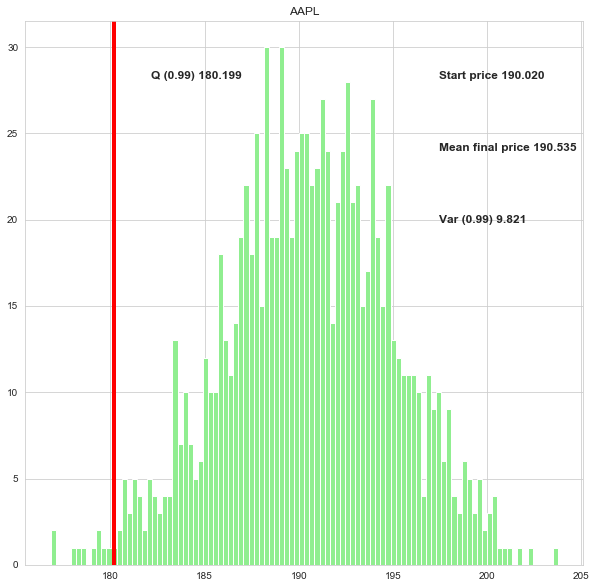

In [429]:
sim_AAPL = np.zeros(runs)
for run in range(runs):
    sim_AAPL[run] = stocks_monte_carlo(start_price = AAPL_start_p, average=AAPL_average, sigma=AAPL_sigma, time_period=365)[-1]
plot_hist_monte_carlo(sim_AAPL, AAPL_start_p, "AAPL", 'lightgreen')

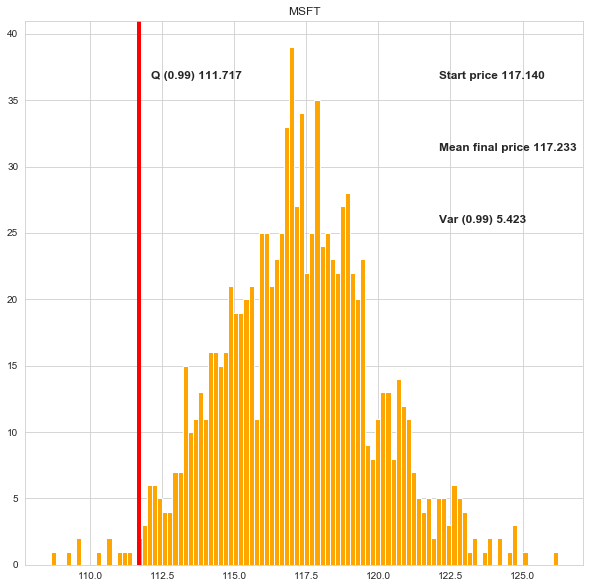

In [430]:
sim_MSFT = np.zeros(runs)
for run in range(runs):
    sim_MSFT[run] = stocks_monte_carlo(start_price = MSFT_start_p, average=MSFT_average, sigma=MSFT_sigma, time_period=365)[-1]
plot_hist_monte_carlo(sim_MSFT, MSFT_start_p, "MSFT", 'orange')

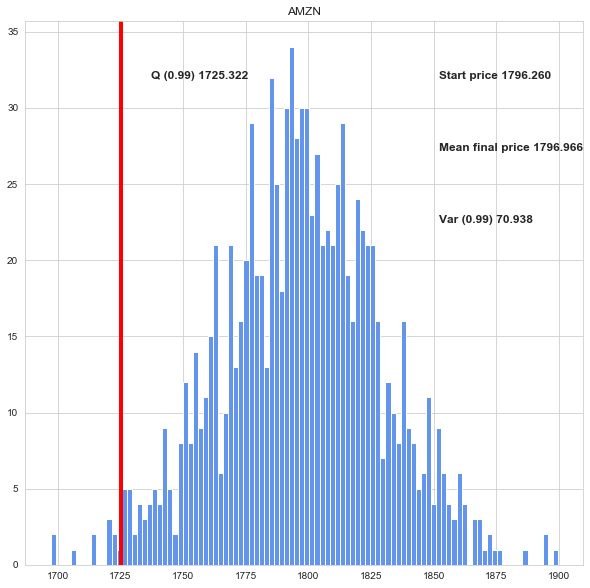

In [431]:
sim_AMZN = np.zeros(runs)
for run in range(runs):
    sim_AMZN[run] = stocks_monte_carlo(start_price = AMZN_start_p, average=AMZN_average, sigma=AMZN_sigma, time_period=365)[-1]
plot_hist_monte_carlo(sim_AMZN, AMZN_start_p, "AMZN", 'cornflowerblue')

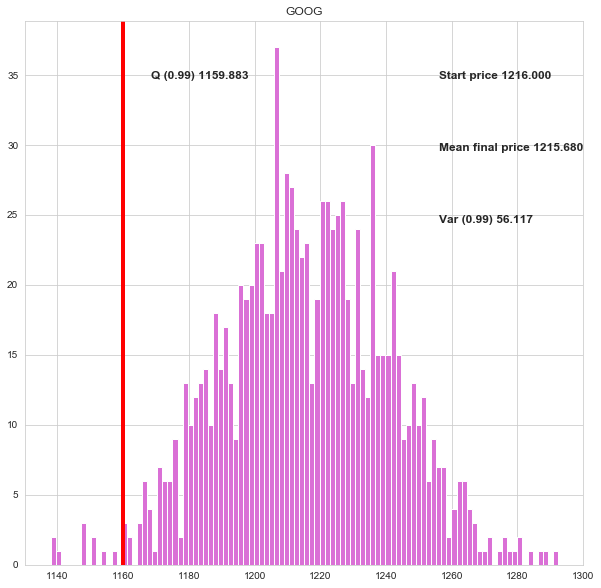

In [432]:
sim_GOOG = np.zeros(runs)
for run in range(runs):
    sim_GOOG[run] = stocks_monte_carlo(start_price = GOOG_start_p, average=GOOG_average, sigma=GOOG_sigma, time_period=365)[-1]
plot_hist_monte_carlo(sim_GOOG, GOOG_start_p, "GOOG", 'orchid')